<a href="https://colab.research.google.com/github/EnilaLeme/Desafio---SQL-e-Pandas---Curso-de-Data-Science/blob/main/Desafio_Kaggle_Aluguel_de_bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desafio - Kaggle - Sql e Pandas
---

Passos:

1 - Criar uma conta no Kaggle.

2 - Entrar na página (fonte): https://www.kaggle.com/benhamner/sf-bay-area-bike-share

3 - Criar um notebook em python.

4 - Utilizar os dados armazenados no banco de dados do desafio.

5 - Criar as relações entre as tabelas - Modelo lógico.

6 - Realizar as análises pedidas no pandas.

In [ ]:
# O banco possui 4 tabelas: station, status, trip, weather. 
# Suas respectivas colunas e a relação entre elas está na imagem a seguir:

!pip install pillow
import PIL

In [ ]:
from PIL import Image

# Carregando a imagem a partir do disco:
image = Image.open("C:/Users/Aline/Desktop/Digital House - Data Science/Slide1.jpg")

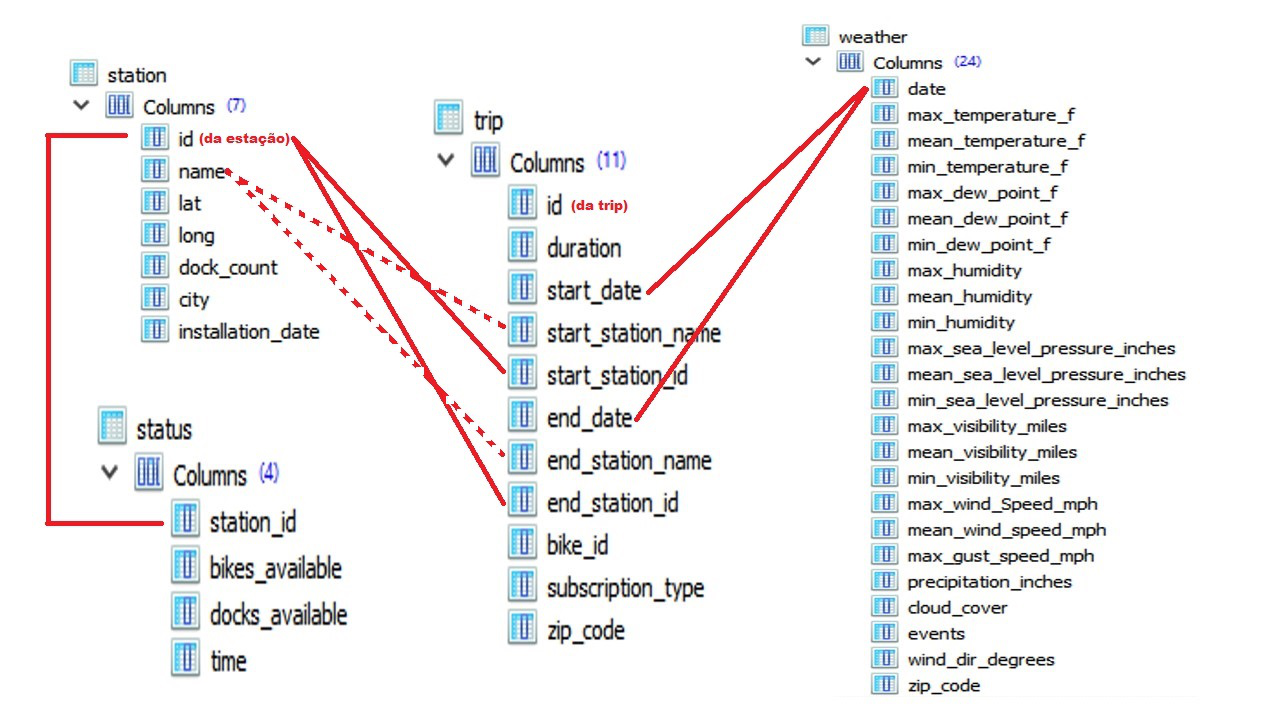

In [ ]:
# Visualizando a imagem:
image

In [ ]:
# Bibliotecas:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Conectando ao banco de dados:
sqliteConnection = sqlite3.connect('database.sqlite')
cursor = sqliteConnection.cursor()
print("Conectado ao banco de dados!")

Conectado ao banco de dados!


##### Análises no Pandas:
---

#### Q1: Qual foi a viagem com a maior duração?

#### Q2: Os usuários não registrados fazem viagens mais longas ou mais curtas?

#### Q3: quais estações são as mais populares?

#### Q4: quais rotas são as mais populares?

In [ ]:
# Selecionando/visualizando as tabelas:

query = """SELECT * FROM  station;""" 
df_query = pd.read_sql_query(query,sqliteConnection)
df_query.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [ ]:
query = """SELECT * FROM  status;""" 
df_query = pd.read_sql_query(query,sqliteConnection)
df_query.head()

In [ ]:
query = """SELECT * FROM  trip;""" 
df_query = pd.read_sql_query(query,sqliteConnection)
df_query.head()

In [ ]:
query = """SELECT * FROM  weather;""" 
df_query = pd.read_sql_query(query,sqliteConnection)
df_query.head()

In [ ]:
# PERGUNTAS:
# Q1: Qual foi a viagem com a maior duração?

query = """ select 
            max(duration), id, start_date, start_station_name, end_date, end_station_name 
            from trip;
         """
df_query = pd.read_sql_query(query,sqliteConnection)
df_query

,max(duration),id,start_date,start_station_name,end_date,end_station_name
0,17270400,568474,12/6/2014 21:59,South Van Ness at Market,6/24/2015 20:18,2nd at Folsom


In [ ]:
# Q2: Os usuários não registrados fazem viagens mais longas ou mais curtas?

query = """ select 
            avg(duration), subscription_type 
            from trip 
            where subscription_type = "Subscriber";
         """
df_subs = pd.read_sql_query(query,sqliteConnection)
df_subs

,avg(duration),subscription_type
0,590.048856,Subscriber


In [ ]:
query = """ select 
            avg(duration), subscription_type 
            from trip 
            where subscription_type = "Customer";
         """
df_cust = pd.read_sql_query(query,sqliteConnection)
df_cust

,avg(duration),subscription_type
0,3951.761329,Customer


In [ ]:
if (df_subs.iloc[0,0] > df_cust.iloc[0,0]): 
    print("A média de duração de corridas de Subscriber (assinantes) é maior que a de Customer (clientes)")
else: 
    print("A média de duração de corridas de Subscriber (assinantes) é menor que a de Customer (clientes)")

A média de duração de corridas de Subscriber (assinantes) é menor que a de Customer (clientes)


In [ ]:
# Q3: quais estações são as mais populares?
query = """ select 
            t.start_station_name, count(*) as qtidade 
            from trip as t 
            group by 1 
            order by 2 desc;
         """
df_start = pd.read_sql_query(query,sqliteConnection)
df_start

,start_station_name,qtidade
0,San Francisco Caltrain (Townsend at 4th),49092
1,San Francisco Caltrain 2 (330 Townsend),33742
2,Harry Bridges Plaza (Ferry Building),32934
3,Embarcadero at Sansome,27713
4,Temporary Transbay Terminal (Howard at Beale),26089
...,...,...
69,San Mateo County Center,287
70,Franklin at Maple,224
71,Redwood City Public Library,213
72,Broadway at Main,67


In [ ]:
query = """ select 
            t.end_station_name, count(*) as qtidade 
            from trip as t 
            group by 1 
            order by 2 desc;
         """
df_end = pd.read_sql_query(query,sqliteConnection)
df_end

,end_station_name,qtidade
0,San Francisco Caltrain (Townsend at 4th),63179
1,San Francisco Caltrain 2 (330 Townsend),35117
2,Harry Bridges Plaza (Ferry Building),33193
3,Embarcadero at Sansome,30796
4,2nd at Townsend,28529
...,...,...
69,Mezes Park,285
70,Redwood City Public Library,277
71,Franklin at Maple,254
72,Broadway at Main,81


In [ ]:
# Q4: quais rotas são as mais populares?

query = """ select 
            t.start_station_name, t.end_station_name, count(*) as qtidade 
            from trip as t 
            group by 1, 2 
            order by 3 desc;
         """
df_rotas = pd.read_sql_query(query,sqliteConnection)
df_rotas

,start_station_name,end_station_name,qtidade
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,6216
1,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,6164
2,Townsend at 7th,San Francisco Caltrain (Townsend at 4th),5041
3,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4839
4,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4357
...,...,...,...
1911,South Van Ness at Market,Palo Alto Caltrain Station,1
1912,Stanford in Redwood City,California Ave Caltrain Station,1
1913,Stanford in Redwood City,Cowper at University,1
1914,University and Emerson,Evelyn Park and Ride,1
